<a href="https://colab.research.google.com/github/princemalvi/calculator/blob/master/1.CNN%20HANDWRITTERN%20DIGIT%20RECOGNIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.CNN for Handwrittern Digit Recognization**

In [ ]:
import tensorflow as tf

In [ ]:
# load and MNIST traint and test  dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print("Train dataset",x_train.shape)
print("Test dataset",x_test.shape)

Train dataset (60000, 28, 28)
Test dataset (10000, 28, 28)


In [ ]:
x_train  = x_train.reshape(x_train.shape[0],28,28,1)
x_test  = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)
input_shape = (28,28,1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
x_train /= 255
x_test / 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D


In [ ]:
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.6479 - accuracy: 0.8675
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2449 - accuracy: 0.9335
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1910 - accuracy: 0.9470
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1746 - accuracy: 0.9536
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1546 - accuracy: 0.9582
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1580 - accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1532 - accuracy: 0.9608
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1451 - accuracy: 0.9625
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1319 - accuracy: 0.9652
Epoch 10/10
1875/1875 [==============================] - 30s 16m

3


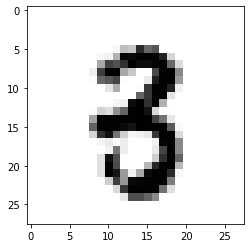

In [ ]:
import matplotlib.pyplot as plt
image_index = 2853
plt.imshow(x_test[image_index].reshape(28,28),cmap="Greys")
predict = x_test[image_index].reshape(28,28)
pred= model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())
